In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
 df = pd.read_csv("Resources/Cleaned_Data.csv")
df.head(6)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
5,1,28.87,6.0,0.0,12.0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [3]:
 # Define features set
X = df.copy()
X.drop("HeartDisease", axis=1, inplace=True)
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
y = df["HeartDisease"]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
X_train.shape

(239846, 50)

In [7]:
X_test.shape

(79949, 50)

In [ ]:
#scaler = StandardScaler()

In [ ]:
#X_scaler = scaler.fit(X_train)

In [ ]:
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
#predictions = rf_model.predict(X_test_scaled)

In [ ]:
#cm = confusion_matrix(y_test, predictions)
#cm_df = pd.DataFrame(
#    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)

# Calculating the accuracy score
#acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
#print("Confusion Matrix")
#display(cm_df)
#print(f"Accuracy Score : {acc_score}")
#print("Classification Report")
#print(classification_report(y_test, predictions))

In [ ]:
#importances = rf_model.feature_importances_
# We can sort the features by their importance
#sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

In [ ]:
 # Visualize the features by importance
#importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
#importances_df.set_index(importances_df[1], inplace=True)
#importances_df.drop(columns=1, inplace=True)
#importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
#importances_sorted = importances_df.sort_values(by='Feature Importances')
#importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [8]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros=RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res,y_res=ros.fit_resample(X_train,y_train)

In [9]:
X_res

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,27.89,10.0,8.0,7.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,18.79,0.0,10.0,7.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.43,0.0,0.0,7.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,29.87,7.0,7.0,4.0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,29.29,30.0,0.0,17.0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438535,29.29,3.0,0.0,6.0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
438536,26.45,0.0,10.0,7.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
438537,45.73,5.0,30.0,8.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
438538,39.60,10.0,15.0,8.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y_res.shape


(438540,)

In [11]:
X_res.shape

(438540, 50)

In [12]:
X_test.shape

(79949, 50)

In [13]:
y_test.shape

(79949,)

In [ ]:
#scaler = StandardScaler()

In [ ]:
#X_scaler1 = scaler.fit(X_res)

In [ ]:
#X_train_scaled1 = X_scaler1.transform(X_res)
#X_test_scaled1 = X_scaler1.transform(X_test)

In [ ]:
#rf_model2 = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
#rf_model2 = rf_model2.fit(X_train_scaled1, y_res)

In [ ]:
#predictions1 = rf_model2.predict(X_test_scaled1)

In [ ]:
#cm1 = confusion_matrix(y_test, predictions1)
#cm_df1 = pd.DataFrame(
#    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)

# Calculating the accuracy score
#acc_score1 = accuracy_score(y_test, predictions1)

In [ ]:
# Displaying results
#print("Confusion Matrix")
#display(cm_df1)
#print(f"Accuracy Score : {acc_score1}")
#print("Classification Report")
#print(classification_report(y_test, predictions1))

In [14]:
y_res = pd.DataFrame(y_res)

In [15]:
y_res

,HeartDisease
0,0
1,0
2,0
3,1
4,0
...,...
438535,1
438536,1
438537,1
438538,1


In [16]:
y_res.value_counts()

HeartDisease
0               219270
1               219270
dtype: int64

In [49]:
#X = pd.concat([X_res, y_res], axis=1)

X = pd.concat([X_train,y_train], axis=1)

In [50]:
X

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,HeartDisease
0,27.89,10.0,8.0,7.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,18.79,0.0,10.0,7.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.43,0.0,0.0,7.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,29.29,30.0,0.0,17.0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,27.89,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394976,25.82,4.0,0.0,8.0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
430091,29.02,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
286381,28.06,30.0,15.0,9.0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
288141,21.02,30.0,7.0,6.0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
No_heart_desease = X[X.HeartDisease == 0]
Yes_heart_desease = X[X.HeartDisease == 1]


In [52]:
from sklearn.utils import resample
Heart_upsampled = resample(Yes_heart_desease,
                          replace=True,
                          n_samples=len(No_heart_desease),
                          random_state=70)

In [53]:
Heart_upsampled 

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,HeartDisease
195692,32.98,0.0,0.0,9.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
401319,22.67,0.0,4.0,6.0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
282244,27.41,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
346992,26.11,0.0,5.0,8.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
322467,27.89,0.0,0.0,5.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426238,30.23,0.0,15.0,12.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
373589,21.29,25.0,0.0,8.0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
343850,40.69,14.0,0.0,7.0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
429184,25.77,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [54]:
heart_upsampled = pd.concat([No_heart_desease, Heart_upsampled])

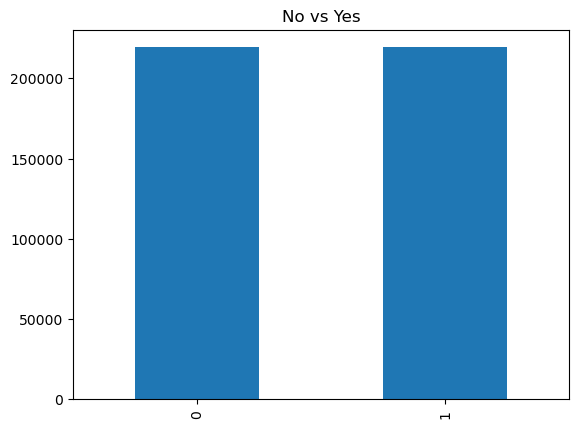

In [55]:
heart_upsampled.HeartDisease.value_counts().plot(kind="bar", title="No vs Yes");

In [56]:
y_train = heart_upsampled.HeartDisease
X_train = heart_upsampled.drop('HeartDisease', axis=1)

In [57]:
X_train.shape

(438540, 50)

In [58]:
y_train.shape

(438540,)

In [59]:
scaler = StandardScaler()

In [60]:
X_scaler = scaler.fit(X_train)

In [61]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [63]:
y_train

0         0
1         0
2         0
4         0
5         0
         ..
426238    1
373589    1
343850    1
429184    1
312844    1
Name: HeartDisease, Length: 438540, dtype: int64

In [64]:
y_train2=y_train.ravel()

In [65]:
y_train2

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [66]:
rf_model = rf_model.fit(X_train_scaled, y_train2)

In [67]:
predictions = rf_model.predict(X_test_scaled)

In [68]:
y_test2=y_test.ravel()

In [69]:
y_test2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [73]:
cm = confusion_matrix(y_test2, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

#Calculating the accuracy score
acc_score = accuracy_score(y_test2, predictions)

In [74]:
 #Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test2, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,69301,3851
Actual 1,5180,1617


Accuracy Score : 0.8870404883112984
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     73152
           1       0.30      0.24      0.26      6797

    accuracy                           0.89     79949
   macro avg       0.61      0.59      0.60     79949
weighted avg       0.88      0.89      0.88     79949



In [75]:
y_deep=heart_upsampled["HeartDisease"].values

In [76]:
X_deep=heart_upsampled.drop(columns=["HeartDisease"]).values

In [79]:
X_train_deep,X_test_deep,y_train_deep,y_test_deep = train_test_split(X_deep,y_deep, random_state=78)

In [80]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_deep = scaler.fit(X_train_deep)

# Scale the data
X_train_scaled_deep = X_scaler_deep.transform(X_train_deep)
X_test_scaled_deep = X_scaler_deep.transform(X_test_deep)

In [83]:
import tensorflow as tf

In [84]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_deep[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 8
#hidden_nodes_layer3 = 40
#hidden_nodes_layer4 = 40
#hidden_nodes_layer5 = 10
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# fifth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


In [85]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [86]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
13705/13705 [==============================] - 11s 742us/step - loss: 0.4908 - accuracy: 0.7660
Epoch 2/100
13705/13705 [==============================] - 10s 729us/step - loss: 0.4843 - accuracy: 0.7704
Epoch 3/100
13705/13705 [==============================] - 10s 760us/step - loss: 0.4832 - accuracy: 0.7705
Epoch 4/100
13705/13705 [==============================] - 20s 1ms/step - loss: 0.4824 - accuracy: 0.7712
Epoch 5/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4819 - accuracy: 0.7715
Epoch 6/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4816 - accuracy: 0.7716
Epoch 7/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4812 - accuracy: 0.7718
Epoch 8/100
13705/13705 [==============================] - 16s 1ms/step - loss: 0.4810 - accuracy: 0.7718
Epoch 9/100
13705/13705 [==============================] - 12s 849us/step - loss: 0.4809 - accuracy: 0.7721
Epoch 10/100
13705/13705 [============

Epoch 77/100
13705/13705 [==============================] - 19s 1ms/step - loss: 0.4780 - accuracy: 0.7732
Epoch 78/100
13705/13705 [==============================] - 16s 1ms/step - loss: 0.4778 - accuracy: 0.7731
Epoch 79/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4780 - accuracy: 0.7731
Epoch 80/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4779 - accuracy: 0.7734
Epoch 81/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4779 - accuracy: 0.7732
Epoch 82/100
13705/13705 [==============================] - 16s 1ms/step - loss: 0.4779 - accuracy: 0.7730
Epoch 83/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4779 - accuracy: 0.7732
Epoch 84/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4779 - accuracy: 0.7733
Epoch 85/100
13705/13705 [==============================] - 17s 1ms/step - loss: 0.4779 - accuracy: 0.7730
Epoch 86/100
13705/13705 [===========

In [90]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled_deep,y_test_deep,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3427/3427 - 2s - loss: 0.4801 - accuracy: 0.7707 - 2s/epoch - 698us/step
Loss: 0.4800631105899811, Accuracy: 0.7707421183586121


In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(y_train_deep, nn.predict(X_train_deep).argmax(axis=1))

cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

10279/10279 [==============================] - 7s 645us/step


In [93]:
cm_df

,Predicted 0,Predicted 1
Actual 0,164532,0
Actual 1,164373,0
